In [1]:
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
taiwan_real_estate = pd.read_csv(r"C:\Users\PC\Desktop\Oluwatobi\Python\Statistics in Python\taiwan_real_estate2.csv")
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

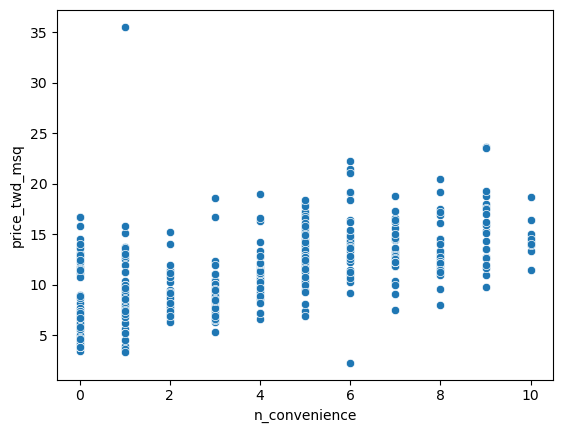

In [4]:
sns.scatterplot(y = 'price_twd_msq',
                x = 'n_convenience',
                data = taiwan_real_estate
               )

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

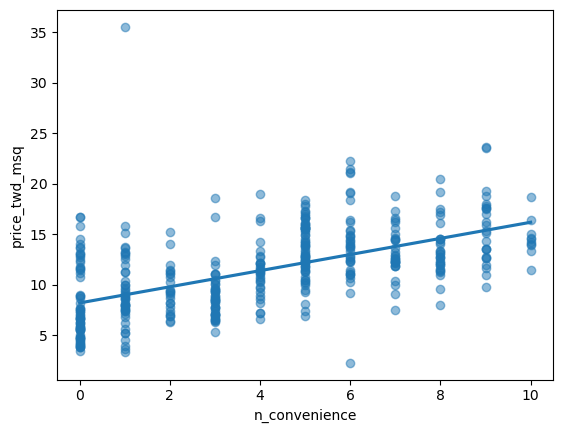

In [5]:
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

In [6]:
from statsmodels.formula.api import ols

In [7]:
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data = taiwan_real_estate).fit()

In [8]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

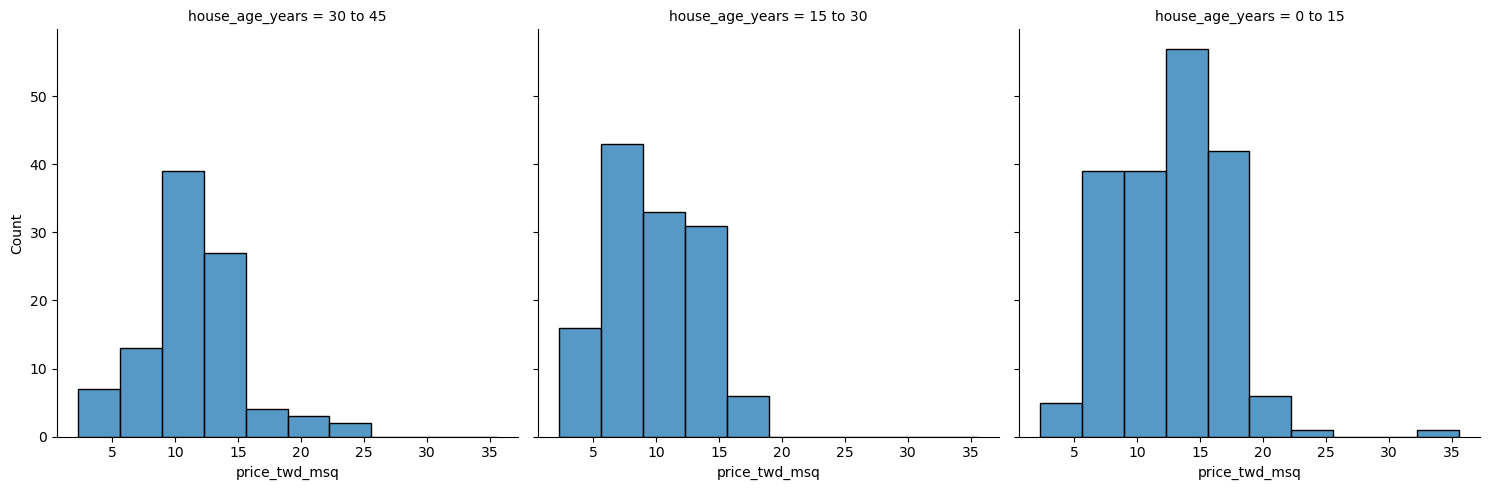

In [9]:
sns.displot(data = taiwan_real_estate,
            x = "price_twd_msq",
            col = "house_age_years",
            col_wrap = 3,
            bins = 10)

In [10]:
taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [11]:
ols("price_twd_msq~house_age_years", data = taiwan_real_estate).fit()

In [12]:

ols("price_twd_msq~house_age_years", data = taiwan_real_estate).fit().params

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64

In [13]:
ols("price_twd_msq~house_age_years + 0", data = taiwan_real_estate).fit().params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

In [14]:
explanatory_data = pd.DataFrame({"n_convenience": np.arange(0, 11)})
explanatory_data

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [15]:
mdl_price_vs_conv.predict(explanatory_data)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64

In [16]:
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
prediction_data

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


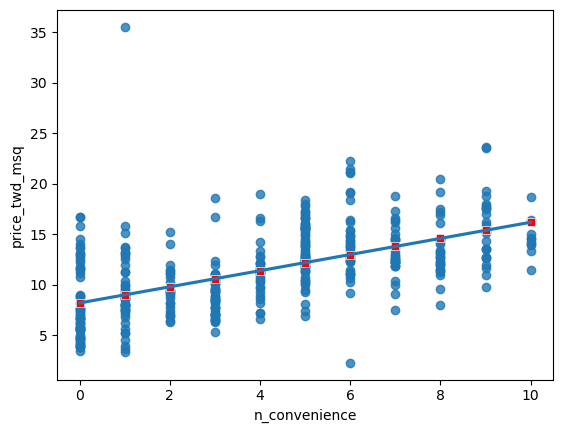

In [17]:
plt.figure()
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
           data = prediction_data,
           color = "red",
           marker = "s")

# Show the layered plot
plt.show()

In [18]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [19]:
mdl_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [20]:
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

In [21]:
mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           3.41e-37
Time:                        00:23:56   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
sp500_yearly_returns = pd.read_csv(r"C:\Users\PC\Desktop\Oluwatobi\Python\Statistics in Python\sp500_yearly_returns.csv")
sp500_yearly_returns

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762
...,...,...,...
488,HFC,0.019944,0.019407
489,FTI,-0.363155,0.120931
490,UAA,0.224532,0.222411
491,UA,0.213964,0.186147


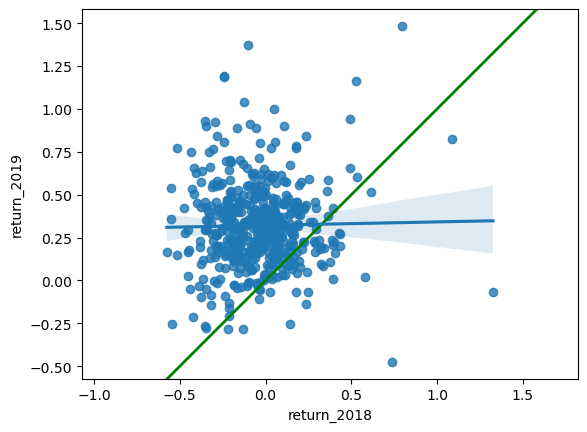

In [29]:
fig = plt.figure()
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

sns.regplot(x = "return_2018", y = "return_2019", data = sp500_yearly_returns)

plt.axis("equal")
plt.show()

In [31]:
mdl_returns = ols("return_2019 ~ return_2018", data = sp500_yearly_returns ).fit()

In [32]:
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [34]:
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})
explanatory_data

,return_2018
0,-1
1,0
2,1


In [35]:
mdl_returns.predict(explanatory_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64

In [40]:
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

<Axes: xlabel='sqrt_dist_to_mrt_m', ylabel='price_twd_msq'>

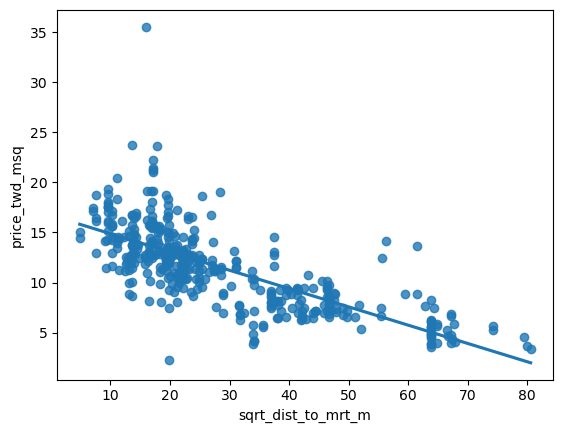

In [46]:
sns.regplot(x = "sqrt_dist_to_mrt_m", y= "price_twd_msq", data =taiwan_real_estate, ci = None)

In [51]:
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data = taiwan_real_estate).fit()
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [55]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})
explanatory_data

,sqrt_dist_to_mrt_m,dist_to_mrt_m
0,0.0,0
1,10.0,100
2,20.0,400
3,30.0,900
4,40.0,1600
5,50.0,2500
6,60.0,3600
7,70.0,4900
8,80.0,6400


In [61]:
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data))

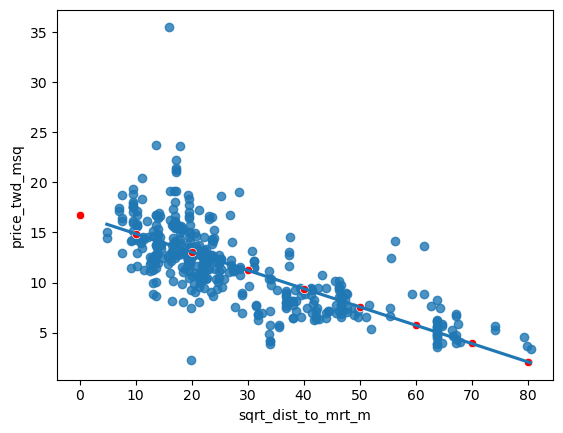

In [62]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x = "sqrt_dist_to_mrt_m", y = "price_twd_msq", data = prediction_data, color="red")
plt.show()

In [63]:
mdl_price_vs_dist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           4.55e-70
Time:                        01:07:50   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.7098      0.278     60.163      0.000      16.164      17.256
sqrt_dist_to_mrt_m    -0.1828      0.008    -21.674      0.000      -0.199      -0.166
==============================================================================
Omnibus:                      169.655   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1645.827
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                      12.315   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
ad_conversion= pd.read_csv(r"C:\Users\PC\Desktop\Oluwatobi\Python\Statistics in Python\ad_conversion.csv")
ad_conversion

,spent_usd,n_impressions,n_clicks
0,1.430000,7350,1
1,1.820000,17861,2
2,1.250000,4259,1
3,1.290000,4133,1
4,4.770000,15615,3
...,...,...,...
931,358.189997,1129773,252
932,173.880003,637549,120
933,40.289999,151531,28
934,198.710001,790253,135


In [67]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25

In [69]:
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

<Axes: xlabel='qdrt_n_impressions', ylabel='qdrt_n_clicks'>

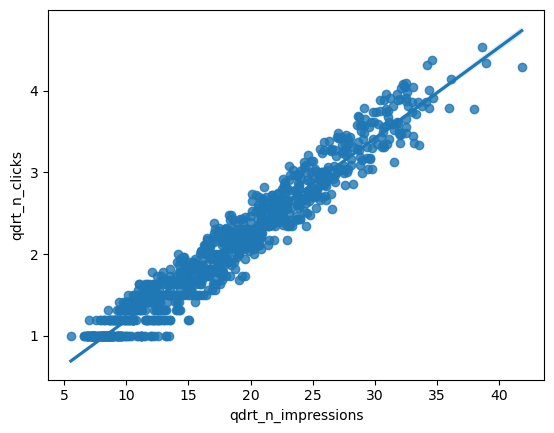

In [74]:
sns.regplot(x = "qdrt_n_impressions", y = "qdrt_n_clicks", data = ad_conversion)

In [79]:
mdl_click_vs_impression_orig = ols("n_clicks~n_impressions", data = ad_conversion).fit()

In [80]:
mdl_click_vs_impression_orig.params

Intercept        1.682896
n_impressions    0.000172
dtype: float64

In [81]:
mdl_click_vs_impression_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:31:30   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133      0.033       0.135       3.231
n_impressions     0.0002   1.96e-06     87.654      0.000       0.000       0.000
==============================================================================
Omnibus:                      247.038   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13215.277
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      21.401   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
mdl_click_vs_impression_trans = ols("qdrt_n_clicks~qdrt_n_impressions", data = ad_conversion).fit()

In [82]:
mdl_click_vs_impression_trans.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

In [83]:
mdl_click_vs_impression_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:32:03   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0.017      4.171      0.000       0.038       0.106
qdrt_n_impressions     0.1115      0.001    126.108      0.000       0.110       0.113
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.637
Skew:                          -0.216   Prob(JB):                      0.00490
Kurtosis:                       2.707   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
mdl_click_vs_impression_orig.rsquared

0.8916134973508041

In [85]:
mdl_click_vs_impression_trans.rsquared

0.9445272817143905

In [86]:
mdl_click_vs_impression_orig.mse_resid

396.24242081894494

In [90]:
np.sqrt(mdl_click_vs_impression_orig.mse_resid)

19.905838862478138

In [89]:
mdl_click_vs_impression_trans.mse_resid

0.038772133892971496

In [91]:
np.sqrt(mdl_click_vs_impression_trans.mse_resid)

0.19690640896875727

In [92]:
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m
0,84.87882,10,30 to 45,11.467474,9.212970
1,306.59470,9,15 to 30,12.768533,17.509846
2,561.98450,5,0 to 15,14.311649,23.706212
3,561.98450,5,0 to 15,16.580938,23.706212
4,390.56840,5,0 to 15,13.040847,19.762803
...,...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607,63.890649
410,90.45606,9,0 to 15,15.128593,9.510839
411,390.96960,7,15 to 30,12.284418,19.772951
412,104.81010,5,0 to 15,15.885023,10.237680


<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

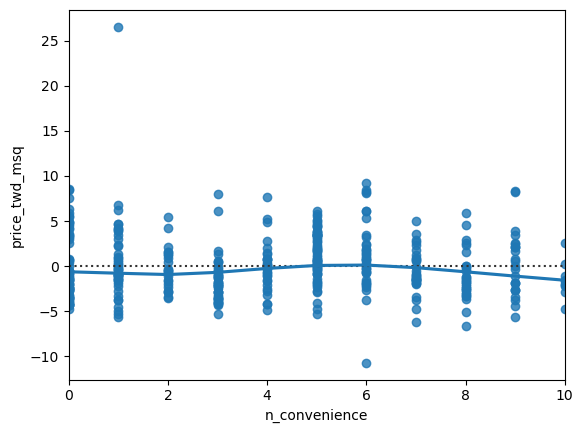

In [95]:
sns.residplot( x = "n_convenience", y = "price_twd_msq", data = taiwan_real_estate, lowess = True)

In [97]:
from statsmodels.api import  qqplot

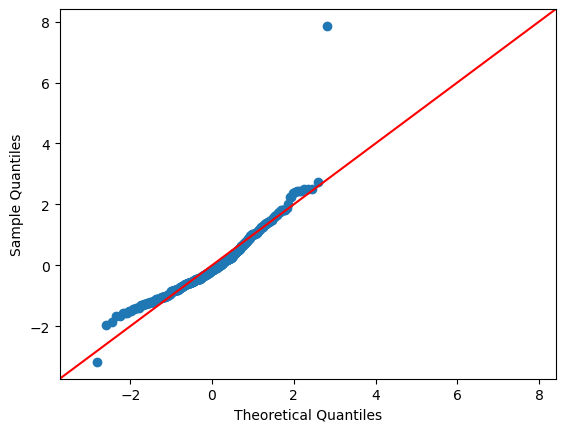

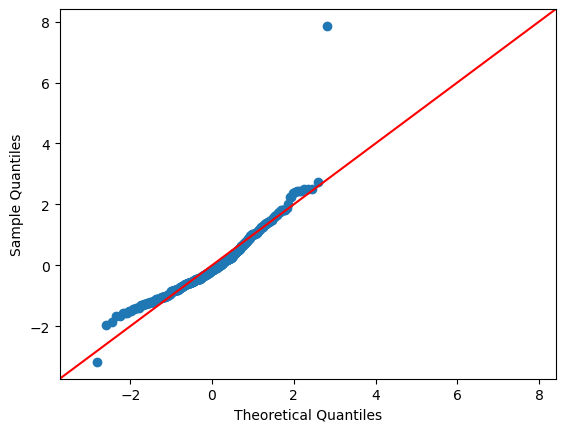

In [102]:
qqplot(data = mdl_price_vs_conv.resid, fit = True, line = "45")

In [100]:
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64